## Newton's Method


In [2]:
using Pkg; Pkg.activate("..")
using Revise
using PyPlot
using LinearAlgebra
using SparseArrays

include("../src/Opt.jl")
import .Opt

 Activating environment at `~/github/misc_impl/opt/Project.toml`


In [3]:
n = 20
f, grad!, hess! = Opt.hard_leastsquares_problem(n)
x0 = zeros(n)
n_iterations = 10
g_abstol = 1e-8
α = 1

fs  = zeros(n_iterations)
grad_norm = zeros(n_iterations)
function access_state(state)
    fs[state.k] = state.f
    grad_norm[state.k] = norm(state.g)
end

access_state (generic function with 1 method)

In [4]:
x = copy(x0)
s = Opt.NewtonMethodState(x0)
H = zeros(n,n)

for k in 1:n_iterations

    s.k, s.f = k, f(x)
    s.x .= x
    grad!(s.g, x)
    hess!(s.H, x)

    access_state(s)
    
    @. x = s.x + α*$(-pinv(s.H)*s.g)

    if norm(s.g) <= g_abstol
        println("Terminate at k=$k: |∇f(xᵏ)| = $(norm(s.g)) <= $g_abstol")
        break
    end
end

Terminate at k=2: |∇f(xᵏ)| = 5.709018973068321e-15 <= 1.0e-8


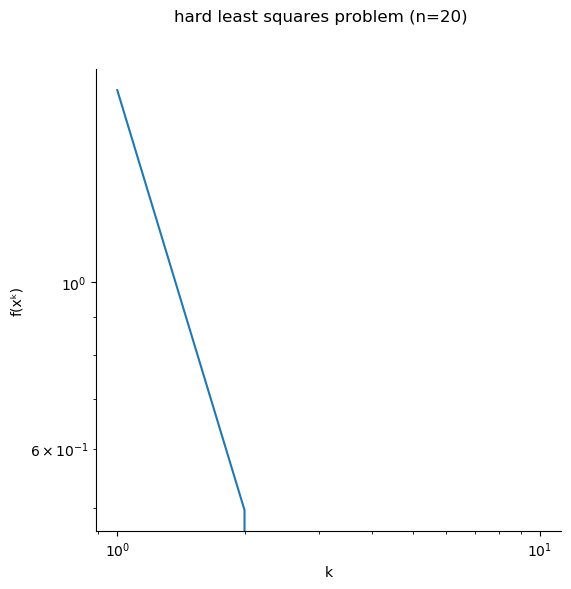

PyObject Text(0.5, 24.0, 'k')

In [5]:
xs = 1:n_iterations
figure(figsize=(6,6))
suptitle("hard least squares problem (n=$n)")
ax = subplot(111)
ax.set_xscale("log")
ax.set_yscale("log")
ax.spines["right"].set_visible(false)
ax.spines["top"].set_visible(false)
plot(xs, fs)
ylabel("f(xᵏ)")
xlabel("k")